# What is NLP? and what are the benefits of learning NLP?

Natural language processing (NLP) is about developing applications and services that are able to understand human languages.

We are talking here about practical examples of natural language processing (NLP) like speech recognition, speech translation, understanding complete sentences, understanding synonyms of matching words, and writing complete grammatically correct sentences and paragraphs.

These are some of the successful implementation of Natural Language Processing (NLP):

- Search engines like Google, Yahoo, etc. Google search engine understands that you are a tech guy so it shows you results related to you.
- Social websites feeds like Facebook news feed. The news feed algorithm understands your interests using natural language processing and shows you related Ads and posts more likely than other posts.
- Speech engines like Apple Siri.
- Spam filters like Google spam filters. It’s not just about the usual spam filtering, now spam filters understand what’s inside the email content and see if it’s a spam or not.

There are many open source Natural Language Processing (NLP) libraries like:

- Natural language toolkit (NLTK).
- Apache OpenNLP.
- Stanford NLP suite.
- Gate NLP library.

NLTK has been called a wonderful tool for teaching and working in computational linguistics using Python and an amazing library to play with natural language. Indeed, it is the most popular library for NLP which was written in Python and has a big community behind it. NLTK also is very easy to learn. 

This NLP post will use Python NLTK library. 

# Installing NLTK in Anaconda environment

First, you need to check if NLTK is already installed in your Anaconda environment by simply typing:

In [1]:
import nltk

If this is not the case, then you should install this package. 

The instruction given below are based on the assumption that you have Anaconda installed. So, to make setup NLTK with conda run the followin via Anaconda Prompt.

``conda install -c anaconda nltk``

You can reverify whether the installation is accurate supplying the below command:

In [2]:
import nltk

# Tokenize Text Using Python
First, we will enter the content of a web page, then we will analyze the text to see what the page is about. We will use the urllib module to explore the web page:

In [3]:
import urllib.request
 
response = urllib.request.urlopen('http://php.net/')
 
html = response.read()
 
print(html)

b'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\n<head>\n\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n  <title>PHP: Hypertext Preprocessor</title>\n\n <link rel="shortcut icon" href="http://php.net/favicon.ico">\n <link rel="search" type="application/opensearchdescription+xml" href="http://php.net/phpnetimprovedsearch.src" title="Add PHP.net search">\n <link rel="alternate" type="application/atom+xml" href="http://php.net/releases/feed.php" title="PHP Release feed">\n <link rel="alternate" type="application/atom+xml" href="http://php.net/feed.atom" title="PHP: Hypertext Preprocessor">\n\n <link rel="canonical" href="http://php.net/index.php">\n <link rel="shorturl" href="http://php.net/index">\n <link rel="alternate" href="http://php.net/index" hreflang="x-default">\n\n\n\n<link rel="stylesheet" type="text/css" href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" media="screen">\n<link rel="styles

As you can see from the printed output, the result contains a lot of HTML tags that need to be cleaned.

We can use BeautifulSoup to clean the grabbed text:

In [4]:
from bs4 import BeautifulSoup
 
import urllib.request
 
response = urllib.request.urlopen('http://php.net/')
 
html = response.read()
 
soup = BeautifulSoup(html,"html5lib")
 
text = soup.get_text(strip=True)
 
print(text)

PHP: Hypertext PreprocessorDownloadsDocumentationGet InvolvedHelpGetting StartedIntroductionA simple tutorialLanguage ReferenceBasic syntaxTypesVariablesConstantsExpressionsOperatorsControl StructuresFunctionsClasses and ObjectsNamespacesErrorsExceptionsGeneratorsReferences ExplainedPredefined VariablesPredefined ExceptionsPredefined Interfaces and ClassesContext options and parametersSupported Protocols and WrappersSecurityIntroductionGeneral considerationsInstalled as CGI binaryInstalled as an Apache moduleSession SecurityFilesystem SecurityDatabase SecurityError ReportingUsing Register GlobalsUser Submitted DataMagic QuotesHiding PHPKeeping CurrentFeaturesHTTP authentication with PHPCookiesSessionsDealing with XFormsHandling file uploadsUsing remote filesConnection handlingPersistent Database ConnectionsSafe ModeCommand line usageGarbage CollectionDTrace Dynamic TracingFunction ReferenceAffecting PHP's BehaviourAudio Formats ManipulationAuthentication ServicesCommand Line Specific E

After obtained a clean text from the crawled web page. Let’s convert that text into tokens by splitting the text like this:

In [5]:
tokens = [t for t in text.split()]

tokens = [token.lower() for token in tokens]
 
print(tokens)

['php:', 'hypertext', 'preprocessordownloadsdocumentationget', 'involvedhelpgetting', 'startedintroductiona', 'simple', 'tutoriallanguage', 'referencebasic', 'syntaxtypesvariablesconstantsexpressionsoperatorscontrol', 'structuresfunctionsclasses', 'and', 'objectsnamespaceserrorsexceptionsgeneratorsreferences', 'explainedpredefined', 'variablespredefined', 'exceptionspredefined', 'interfaces', 'and', 'classescontext', 'options', 'and', 'parameterssupported', 'protocols', 'and', 'wrapperssecurityintroductiongeneral', 'considerationsinstalled', 'as', 'cgi', 'binaryinstalled', 'as', 'an', 'apache', 'modulesession', 'securityfilesystem', 'securitydatabase', 'securityerror', 'reportingusing', 'register', 'globalsuser', 'submitted', 'datamagic', 'quoteshiding', 'phpkeeping', 'currentfeatureshttp', 'authentication', 'with', 'phpcookiessessionsdealing', 'with', 'xformshandling', 'file', 'uploadsusing', 'remote', 'filesconnection', 'handlingpersistent', 'database', 'connectionssafe', 'modecomman

# Count Word Frequency

Let’s calculate the frequency distribution of those tokens using Python NLTK. For this, we can use a function in NLTK called ``FreqDist()``:

In [6]:
freq = nltk.FreqDist(tokens)
     
import pandas as pd

df = pd.DataFrame.from_dict(freq, orient='index')
df = df.rename(columns={0:'freq'})
result = df.sort_values(['freq'], ascending=False)

result.head(10)

,freq
php,116
the,113
of,89
release,73
in,71
and,68
can,66
be,61
is,56
found,56


According to the sorted result, you’ll find that the most frequent token is PHP. You can plot a graph for those tokens using plot function like this:

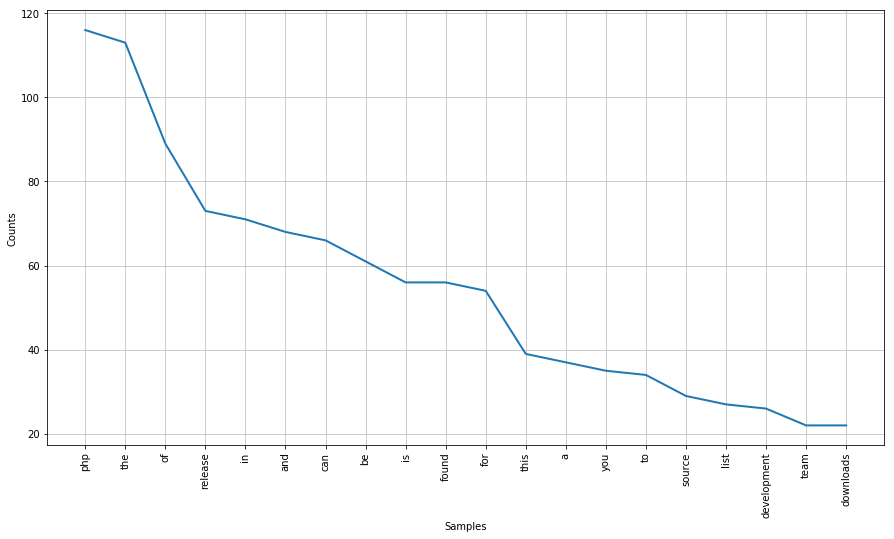

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
freq.plot(20, cumulative=False)
plt.show()

From the graph, this article is talking about PHP. However, there are some words like The, Of, a, an, and so on which are called stop words. Indeed, stop words should be removed to prevent them from affecting the results.

# Remove Stop Words Using NLTK

NLTK is shipped with stop words lists for most languages. To get English stop words, you should import stopwords.

After, you can modify the code and clean the tokens before plotting the graph. First, we will make a copy of the list, then we will iterate over the tokens and remove the stop words:

In [8]:
from nltk.corpus import stopwords

clean_tokens = tokens.copy()

clean_tokens = [token.lower() for token in clean_tokens]

for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)
 
clean_freq = nltk.FreqDist(clean_tokens)

clean_df = pd.DataFrame.from_dict(clean_freq, orient='index')
clean_df = clean_df.rename(columns={0:'freq'})
clean_result = clean_df.sort_values(['freq'], ascending=False)

clean_result.head(10)

,freq
php,116
release,73
found,56
source,29
list,27
development,26
please,22
downloads,22
visit,22
team,22


If you check the graph now, it’s better than before since no stop words on the count.

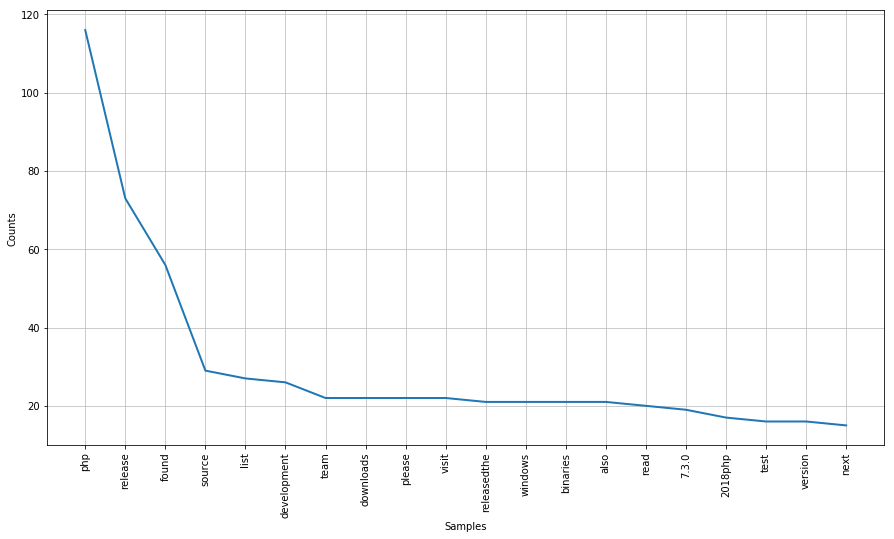

In [9]:
plt.figure(figsize=(15,8))
clean_freq.plot(20, cumulative=False)
plt.show()

# Tokenize Text Using NLTK

We saw how to split the text into tokens using split function, now we will see how to tokenize the text using NLTK.

Tokenizing text is important since text can’t be processed without tokenization. Tokenization process means splitting bigger parts to small parts.

You can tokenize paragraphs to sentences and tokenize sentences to words according to your needs. NLTK is shipped with sentence tokenizer and word tokenizer.

Let’s assume that we have a sample text like into the following mytext variable. To tokenize this text to sentences, we will use sentence tokenizer:

In [10]:
from nltk.tokenize import sent_tokenize
 
mytext = "Hello Adam, how are you? I hope everything is going well. Today is a good day, see you dude."
 
print(sent_tokenize(mytext))

['Hello Adam, how are you?', 'I hope everything is going well.', 'Today is a good day, see you dude.']


You may say that this is an easy job, I don’t need to use NLTK tokenization, and I can split sentences using regular expressions since every sentence precedes by punctuation and space. Now, take a look at the following text in which the word Mr. is one word by itself. Let’s try NLTK:

In [11]:
mytext = "Hello Mr. Adam, how are you? I hope everything is going well. Today is a good day, see you dude."
 
print(sent_tokenize(mytext))

['Hello Mr. Adam, how are you?', 'I hope everything is going well.', 'Today is a good day, see you dude.']


The word Mr. is one word as expected. NLTK uses PunktSentenceTokenizer which is a part of nltk.tokenize.punkt module. This tokenizer trained well to work with many languages.

# Tokenize non-English Languages Text
To tokenize other languages, you should specify the language like this:

In [12]:
mytext = "Bonjour M. Adam, comment allez-vous? J'espère que tout va bien. Aujourd'hui est un bon jour."
 
print(sent_tokenize(mytext,"french"))

['Bonjour M. Adam, comment allez-vous?', "J'espère que tout va bien.", "Aujourd'hui est un bon jour."]


# Get Synonyms from WordNet

If you remember we installed NLTK packages using nltk.download(). One of the packages was WordNet. WordNet is a database which is built for natural language processing. It includes groups of synonyms and a brief definition. You can get these definitions and examples for a given word like this:

In [13]:
from nltk.corpus import wordnet
 
syn = wordnet.synsets("pain")
 
print(syn[0].definition())
 
print(syn[0].examples())

a symptom of some physical hurt or disorder
['the patient developed severe pain and distension']


WordNet includes a lot of definitions:

In [14]:
syn = wordnet.synsets("NLP")
 
print(syn[0].definition())
 
syn = wordnet.synsets("Python")
 
print(syn[0].definition())

the branch of information science that deals with natural language information
large Old World boas


You can use WordNet to get synonymous words like this:

In [15]:
synonyms = []
 
for syn in wordnet.synsets('Computer'):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())
 
print(synonyms)

['computer', 'computing_machine', 'computing_device', 'data_processor', 'electronic_computer', 'information_processing_system', 'calculator', 'reckoner', 'figurer', 'estimator', 'computer']


# Get Antonyms from WordNet

You can get the antonyms words with the same way, all you have to do is to check the lemmas before adding them to the array if it’s an antonym or not.

In [16]:
antonyms = []
 
for syn in wordnet.synsets("small"):
    for lemma in syn.lemmas():
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())
            
print(antonyms)

['large', 'big', 'big']


# NLTK Word Stemming

Word stemming means removing affixes from words and return the root word. Ex: The stem of the word working => work.

Search engines use this technique when indexing pages, so many people write different versions for the same word and all of them are stemmed to the root word. There are many algorithms for stemming, but the most used algorithm is Porter stemming algorithm.

NLTK has a class called PorterStemmer which uses Porter stemming algorithm.

In [17]:
from nltk.stem import PorterStemmer
 
stemmer = PorterStemmer()
 
print(stemmer.stem('working'))

work


# Lemmatizing Words Using WordNet

Word lemmatizing is similar to stemming, but the difference is the result of lemmatizing is a real word.

Unlike stemming, when you try to stem some words, it will result in something like this:

In [18]:
print(stemmer.stem('increases'))

increas


If we try to lemmatize the same word using NLTK WordNet, the result is correct:

In [19]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
 
print(lemmatizer.lemmatize('increases'))

increase


The result might end up with a synonym or a different word with the same meaning.

Sometimes, if you try to lemmatize a word like the word playing, it will end up with the same word.

This is because the default part of speech is nouns. To get verbs, you should specify it like this:

In [20]:
print(lemmatizer.lemmatize('playing', pos="v"))
print(lemmatizer.lemmatize('adding', pos="v"))

play
add


# Stemming and Lemmatization Difference

Let’s try stemming and lemmatization for some words:

In [21]:
print(stemmer.stem('stones'))
 
print(stemmer.stem('speaking'))
 
print(stemmer.stem('bedroom'))
 
print(stemmer.stem('jokes'))
 
print(stemmer.stem('lisa'))
 
print(stemmer.stem('purple'))
 
print('----------------------')
 
print(lemmatizer.lemmatize('stones'))
 
print(lemmatizer.lemmatize('speaking'))
 
print(lemmatizer.lemmatize('bedroom'))
 
print(lemmatizer.lemmatize('jokes'))
 
print(lemmatizer.lemmatize('lisa'))
 
print(lemmatizer.lemmatize('purple'))

stone
speak
bedroom
joke
lisa
purpl
----------------------
stone
speaking
bedroom
joke
lisa
purple


Stemming works on words without knowing its context and that’s why stemming has lower accuracy and faster than lemmatization. It seems that lemmatizing is better than stemming. Word lemmatizing returns a real word even if it’s not the same word, it could be a synonym, but at least it’s a real word.